In [1]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import tensorflow as tf
from keras import Input, Model
from keras.models import Sequential, Model


import random

import sys
sys.path.append("..")

import dataset,network,dcgan_model

# Load data

In [2]:
# Preprocessing
scenario= "moons" #sinus, helix
n_instance = 1000
n_features = 2
latent_space =6 #6
BATCH_SIZE = 100 #50
scales = ['-1-1','0-1']
scaled = '-1-1'
epochs = 3000  #10000

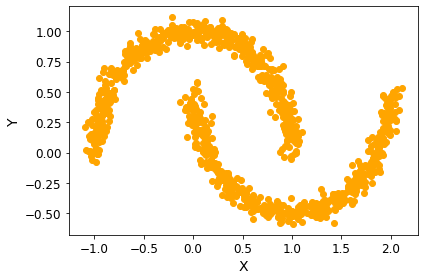

In [3]:
if scenario in ("3d", "helix"):
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    print("X_train= x,y",X_train.shape)
    print("y_train= z",y_train.shape)

    ax = plt.subplot(projection='3d')
    plt.xlim([-1.5,1.5])
    plt.ylim([-1.5,1.5])
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='orange')
    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    plt.tight_layout()

    
else:
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    plt.scatter(X_train,y_train, c='orange', label='Sample Data')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

In [4]:
os.system('mkdir Dataset')
os.system('mkdir GANS')
os.system('mkdir GANS/Models')
os.system('mkdir GANS/Losses')
os.system('mkdir GANS/Random_test')
export_excel(X_train, 'Dataset/X_train')
export_excel(y_train, 'Dataset/y_train')

# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')

print('made dataset')

made dataset


# DC-GAN

### Architecture

In [5]:
generator=network.build_generator(latent_space, n_features)
print('##########generator##########:')
generator.summary()
discriminator=network.build_discriminator(n_features, latent_space, BATCH_SIZE)
print('##########discriminator##########:')
discriminator.summary()
dcgan = dcgan_model.DC_GAN(n_features,latent_space,BATCH_SIZE)

##########generator##########:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                96        
_________________________________________________________________
batch_normalization (BatchNo (None, 16)                64        
_________________________________________________________________
re_lu (ReLU)                 (None, 16)                0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4)              0         
_________________________________________________________________
conv1d_transpose (Conv1DTran (None, 4, 12)             60        
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 12)             48        
_________________________________________________________________
re_lu_1 (ReLU)           

### Preprocessing

In [6]:
train_dataset, scaler, X_train_scaled = dcgan.preproc(X_train, y_train, scaled)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_train_scaled",X_train_scaled.shape)

for data in train_dataset:
    print('train_dataset',data.shape)

data shape_1 (100, 2)
data shape_2 (100, 2)
data shape_3 (100, 2)
data shape_4 (100, 2)
data shape_5 (100, 2)
data shape_6 (100, 2)
data shape_7 (100, 2)
data shape_8 (100, 2)
data shape_9 (100, 2)
data shape_10 (100, 2)
Cycles:  10
X_train (1000, 1)
y_train (1000, 1)
X_train_scaled (1000, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)


In [7]:
hist = dcgan.train(train_dataset, epochs, scaler, scaled, X_train=None, y_train=None)

Epoch 1/3000
Epoch 2/3000
Epoch 3/3000
Epoch 4/3000
Epoch 5/3000
Epoch 6/3000
Epoch 7/3000
Epoch 8/3000
Epoch 9/3000
Epoch 10/3000
Epoch 11/3000
Epoch 12/3000
Epoch 13/3000
Epoch 14/3000
Epoch 15/3000
Epoch 16/3000
Epoch 17/3000
Epoch 18/3000
Epoch 19/3000
Epoch 20/3000
Epoch 21/3000
Epoch 22/3000
Epoch 23/3000
Epoch 24/3000
Epoch 25/3000
Epoch 26/3000
Epoch 27/3000
Epoch 28/3000
Epoch 29/3000
Epoch 30/3000
Epoch 31/3000
Epoch 32/3000
Epoch 33/3000
Epoch 34/3000
Epoch 35/3000
Epoch 36/3000
Epoch 37/3000
Epoch 38/3000
Epoch 39/3000
Epoch 40/3000
Epoch 41/3000
Epoch 42/3000
Epoch 43/3000
Epoch 44/3000
Epoch 45/3000
Epoch 46/3000
Epoch 47/3000
Epoch 48/3000
Epoch 49/3000
Epoch 50/3000
Epoch 51/3000
Epoch 52/3000
Epoch 53/3000
Epoch 54/3000
Epoch 55/3000
Epoch 56/3000
Epoch 57/3000
Epoch 58/3000
Epoch 59/3000
Epoch 60/3000
Epoch 61/3000
Epoch 62/3000
Epoch 63/3000
Epoch 64/3000
Epoch 65/3000
Epoch 66/3000
Epoch 67/3000
Epoch 68/3000
Epoch 69/3000
Epoch 70/3000
Epoch 71/3000
Epoch 72/3000
E

Epoch 557/3000
Epoch 558/3000
Epoch 559/3000
Epoch 560/3000
Epoch 561/3000
Epoch 562/3000
Epoch 563/3000
Epoch 564/3000
Epoch 565/3000
Epoch 566/3000
Epoch 567/3000
Epoch 568/3000
Epoch 569/3000
Epoch 570/3000
Epoch 571/3000
Epoch 572/3000
Epoch 573/3000
Epoch 574/3000
Epoch 575/3000
Epoch 576/3000
Epoch 577/3000
Epoch 578/3000
Epoch 579/3000
Epoch 580/3000
Epoch 581/3000
Epoch 582/3000
Epoch 583/3000
Epoch 584/3000
Epoch 585/3000
Epoch 586/3000
Epoch 587/3000
Epoch 588/3000
Epoch 589/3000
Epoch 590/3000
Epoch 591/3000
Epoch 592/3000
Epoch 593/3000
Epoch 594/3000
Epoch 595/3000
Epoch 596/3000
Epoch 597/3000
Epoch 598/3000
Epoch 599/3000
Epoch 600/3000
Epoch 601/3000
Epoch 602/3000
Epoch 603/3000
Epoch 604/3000
Epoch 605/3000
Epoch 606/3000
Epoch 607/3000
Epoch 608/3000
Epoch 609/3000
Epoch 610/3000
Epoch 611/3000
Epoch 612/3000
Epoch 613/3000
Epoch 614/3000
Epoch 615/3000
Epoch 616/3000
Epoch 617/3000
Epoch 618/3000
Epoch 619/3000
Epoch 620/3000
Epoch 621/3000
Epoch 622/3000
Epoch 623/

Epoch 1100/3000
Epoch 1101/3000
Epoch 1102/3000
Epoch 1103/3000
Epoch 1104/3000
Epoch 1105/3000
Epoch 1106/3000
Epoch 1107/3000
Epoch 1108/3000
Epoch 1109/3000
Epoch 1110/3000
Epoch 1111/3000
Epoch 1112/3000
Epoch 1113/3000
Epoch 1114/3000
Epoch 1115/3000
Epoch 1116/3000
Epoch 1117/3000
Epoch 1118/3000
Epoch 1119/3000
Epoch 1120/3000
Epoch 1121/3000
Epoch 1122/3000
Epoch 1123/3000
Epoch 1124/3000
Epoch 1125/3000
Epoch 1126/3000
Epoch 1127/3000
Epoch 1128/3000
Epoch 1129/3000
Epoch 1130/3000
Epoch 1131/3000
Epoch 1132/3000
Epoch 1133/3000
Epoch 1134/3000
Epoch 1135/3000
Epoch 1136/3000
Epoch 1137/3000
Epoch 1138/3000
Epoch 1139/3000
Epoch 1140/3000
Epoch 1141/3000
Epoch 1142/3000
Epoch 1143/3000
Epoch 1144/3000
Epoch 1145/3000
Epoch 1146/3000
Epoch 1147/3000
Epoch 1148/3000
Epoch 1149/3000
Epoch 1150/3000
Epoch 1151/3000
Epoch 1152/3000
Epoch 1153/3000
Epoch 1154/3000
Epoch 1155/3000
Epoch 1156/3000
Epoch 1157/3000
Epoch 1158/3000
Epoch 1159/3000
Epoch 1160/3000
Epoch 1161/3000
Epoch 11

Epoch 1617/3000
Epoch 1618/3000
Epoch 1619/3000
Epoch 1620/3000
Epoch 1621/3000
Epoch 1622/3000
Epoch 1623/3000
Epoch 1624/3000
Epoch 1625/3000
Epoch 1626/3000
Epoch 1627/3000
Epoch 1628/3000
Epoch 1629/3000
Epoch 1630/3000
Epoch 1631/3000
Epoch 1632/3000
Epoch 1633/3000
Epoch 1634/3000
Epoch 1635/3000
Epoch 1636/3000
Epoch 1637/3000
Epoch 1638/3000
Epoch 1639/3000
Epoch 1640/3000
Epoch 1641/3000
Epoch 1642/3000
Epoch 1643/3000
Epoch 1644/3000
Epoch 1645/3000
Epoch 1646/3000
Epoch 1647/3000
Epoch 1648/3000
Epoch 1649/3000
Epoch 1650/3000
Epoch 1651/3000
Epoch 1652/3000
Epoch 1653/3000
Epoch 1654/3000
Epoch 1655/3000
Epoch 1656/3000
Epoch 1657/3000
Epoch 1658/3000
Epoch 1659/3000
Epoch 1660/3000
Epoch 1661/3000
Epoch 1662/3000
Epoch 1663/3000
Epoch 1664/3000
Epoch 1665/3000
Epoch 1666/3000
Epoch 1667/3000
Epoch 1668/3000
Epoch 1669/3000
Epoch 1670/3000
Epoch 1671/3000
Epoch 1672/3000
Epoch 1673/3000
Epoch 1674/3000
Epoch 1675/3000
Epoch 1676/3000
Epoch 1677/3000
Epoch 1678/3000
Epoch 16

Epoch 2130/3000
Epoch 2131/3000
Epoch 2132/3000
Epoch 2133/3000
Epoch 2134/3000
Epoch 2135/3000
Epoch 2136/3000
Epoch 2137/3000
Epoch 2138/3000
Epoch 2139/3000
Epoch 2140/3000
Epoch 2141/3000
Epoch 2142/3000
Epoch 2143/3000
Epoch 2144/3000
Epoch 2145/3000
Epoch 2146/3000
Epoch 2147/3000
Epoch 2148/3000
Epoch 2149/3000
Epoch 2150/3000
Epoch 2151/3000
Epoch 2152/3000
Epoch 2153/3000
Epoch 2154/3000
Epoch 2155/3000
Epoch 2156/3000
Epoch 2157/3000
Epoch 2158/3000
Epoch 2159/3000
Epoch 2160/3000
Epoch 2161/3000
Epoch 2162/3000
Epoch 2163/3000
Epoch 2164/3000
Epoch 2165/3000
Epoch 2166/3000
Epoch 2167/3000
Epoch 2168/3000
Epoch 2169/3000
Epoch 2170/3000
Epoch 2171/3000
Epoch 2172/3000
Epoch 2173/3000
Epoch 2174/3000
Epoch 2175/3000
Epoch 2176/3000
Epoch 2177/3000
Epoch 2178/3000
Epoch 2179/3000
Epoch 2180/3000
Epoch 2181/3000
Epoch 2182/3000
Epoch 2183/3000
Epoch 2184/3000
Epoch 2185/3000
Epoch 2186/3000
Epoch 2187/3000
Epoch 2188/3000
Epoch 2189/3000
Epoch 2190/3000
Epoch 2191/3000
Epoch 21

Epoch 2646/3000
Epoch 2647/3000
Epoch 2648/3000
Epoch 2649/3000
Epoch 2650/3000
Epoch 2651/3000
Epoch 2652/3000
Epoch 2653/3000
Epoch 2654/3000
Epoch 2655/3000
Epoch 2656/3000
Epoch 2657/3000
Epoch 2658/3000
Epoch 2659/3000
Epoch 2660/3000
Epoch 2661/3000
Epoch 2662/3000
Epoch 2663/3000
Epoch 2664/3000
Epoch 2665/3000
Epoch 2666/3000
Epoch 2667/3000
Epoch 2668/3000
Epoch 2669/3000
Epoch 2670/3000
Epoch 2671/3000
Epoch 2672/3000
Epoch 2673/3000
Epoch 2674/3000
Epoch 2675/3000
Epoch 2676/3000
Epoch 2677/3000
Epoch 2678/3000
Epoch 2679/3000
Epoch 2680/3000
Epoch 2681/3000
Epoch 2682/3000
Epoch 2683/3000
Epoch 2684/3000
Epoch 2685/3000
Epoch 2686/3000
Epoch 2687/3000
Epoch 2688/3000
Epoch 2689/3000
Epoch 2690/3000
Epoch 2691/3000
Epoch 2692/3000
Epoch 2693/3000
Epoch 2694/3000
Epoch 2695/3000
Epoch 2696/3000
Epoch 2697/3000
Epoch 2698/3000
Epoch 2699/3000
Epoch 2700/3000
Epoch 2701/3000
Epoch 2702/3000
Epoch 2703/3000
Epoch 2704/3000
Epoch 2705/3000
Epoch 2706/3000
Epoch 2707/3000
Epoch 27

#### plot loss

Loss: 


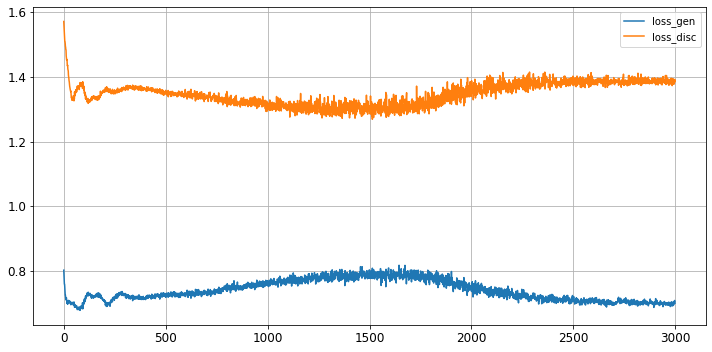

In [8]:
print('Loss: ')
fig, ax = plt.subplots(1,1, figsize=[10,5])
ax.plot(hist)
ax.legend(['loss_gen', 'loss_disc'],)

ax.grid()
plt.tight_layout()
plt.savefig('GANS/Losses/GANS_loss'+'.png')

### Sampleing from the latent space

Predicted Values: (1000, 2)


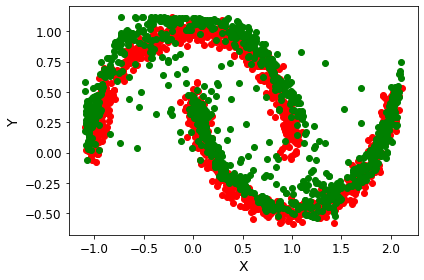

In [9]:
#sampling from the latent space without prediction
latent_values = tf.random.normal([1000, latent_space], mean=0.0, stddev=0.1)

#predict the labels of the data values on the basis of the trained model.
predicted_values = dcgan.generator.predict(latent_values)
if scaled == '-1-1':
    predicted_values[:,:]=(predicted_values[:,:])
    predicted_values = scaler.inverse_transform(predicted_values)
elif scaled =='0-1':
    predicted_values = scaler.inverse_transform(predicted_values)
    

if n_features==3:
    print("Predicted Values:",predicted_values.shape)
    print("latent_space:",latent_space)
    print("BATCH_SIZE:",BATCH_SIZE)
    print("use_bias:",use_bias)
    print("epochs:",epochs)
    

    ab = plt.subplot(projection='3d')
    ab.scatter(X_train[:,0],X_train[:,1],y_train, c='r')
    ab.scatter(predicted_values[:,0],predicted_values[:,1],predicted_values[:,2], c='green')
    ab.set_ylabel('Y')
    ab.set_zlabel('Z')
    ab.set_xlabel('X')
    
    
else:
    print("Predicted Values:",predicted_values.shape)
    plt.scatter(X_train, y_train,c='r')
    plt.scatter(predicted_values[:,0],predicted_values[:,1], c='green')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()
    

### Applying the prediction function

## Fixed Input

input_test : (700, 2)


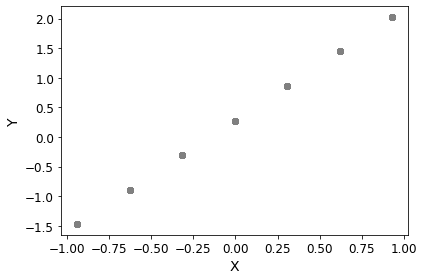

In [10]:
# define these for desired prediction
x_input = [-1.0,-0.5,0,0.5,1.0,1.5,2.0]
n_points = 700
y_min = -1
y_max = 1

# produces an input of fixed x coordinates with random y values
predict1 = np.full((n_points//7, n_features), x_input[0])
predict2 = np.full((n_points//7, n_features), x_input[1])
predict3 = np.full((n_points//7, n_features), x_input[2])
predict4 = np.full((n_points//7, n_features), x_input[3])
predict5 = np.full((n_points//7, n_features), x_input[4])
predict6 = np.full((n_points//7, n_features), x_input[5])
predict7 = np.full((n_points//7, n_features), x_input[6])

predictthis = np.concatenate((predict1, predict2, predict3, predict4, predict5, predict6, predict7))
predictthis = scaler.transform(predictthis)
input_test = predictthis.reshape(n_points, n_features).astype('float32')


print("input_test :",input_test.shape)
plt.scatter(input_test[:,0],input_test[:,1] ,c='grey')
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()
    

In [11]:
X_generated = dcgan.predict(input_test, scaler)

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)


Generated Data: (699, 2)


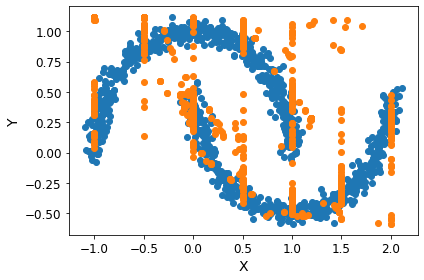

In [12]:
if scenario in ("3d", "helix"):
    print("latent_space=",latent_space)
    print("Epochs=",epochs)
    print("BATCH_SIZE=",BATCH_SIZE)
    print("use_bias=",use_bias)
    
    ax = plt.subplot(projection='3d')
    ax.scatter(X_generated[:,0], X_generated[:,1], X_generated[:,2], label='Generated Data')
    #ax.scatter(X_train[:,0], X_train[:,1], y_train, c='r', label='Sample Data')

    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    plt.legend(loc='best')
    plt.tight_layout()
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(X_generated[:,0],X_generated[:,1])
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(X_generated[:,1],X_generated[:,2])
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(X_generated[:,0],X_generated[:,2])
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(X_generated[:,0]>=-0.8-0.05,X_generated[:,0]<=-0.8+0.05),X_generated[:,1],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(X_generated[:,0]>=0.0-0.05,X_generated[:,0]<=0.0+0.05),X_generated[:,1],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(X_generated[:,0]>=0.8-0.05,X_generated[:,0]<=0.8+0.05),X_generated[:,1],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(X_generated[:,1]>=0.2-0.05,X_generated[:,1]<=0.2+0.05),X_generated[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(X_generated[:,1]>=0.5-0.05,X_generated[:,1]<=0.5+0.05),X_generated[:,0],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(X_generated[:,1]>=0.8-0.05,X_generated[:,1]<=0.8+0.05),X_generated[:,0],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    print("Generated Data:",X_generated.shape)
    plt.scatter(X_train, y_train,label="Sample Data")
    plt.scatter(X_generated[:,0],X_generated[:,1])
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()